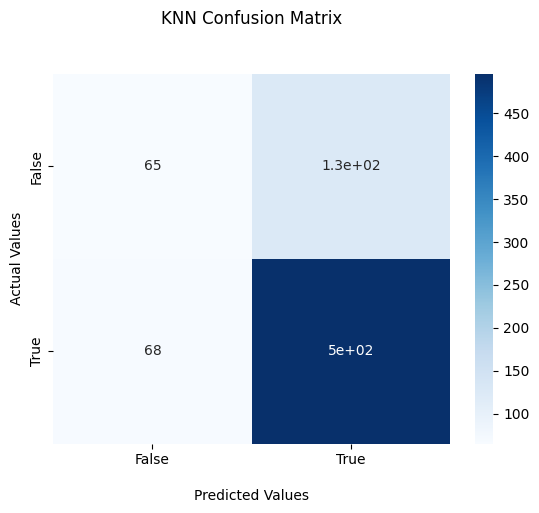

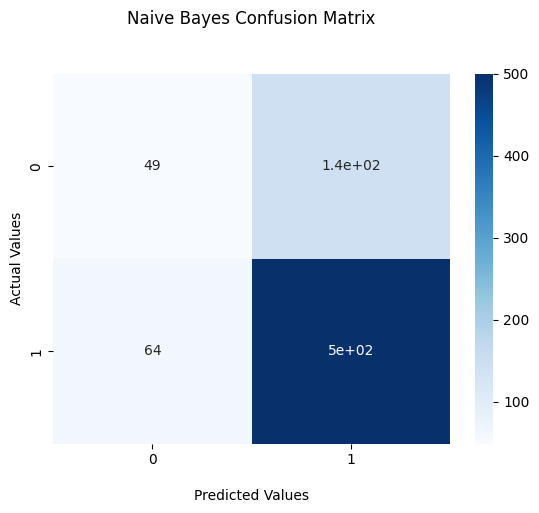

In [28]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics, datasets
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

classNames = ['class']
#accuraciesKNN = []
#accuraciesNB = []



def modelEvaluation(X, y):

    folds = StratifiedKFold(n_splits=10)

    KNN_confMatrix = np.zeros((2, 2))
    NB_confMatrix = np.zeros((2, 2))


    KNNPredictor = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'uniform')
    NBPredictor = GaussianNB()

    splitFolds = folds.split(X, y)

    # iterate per fold
    for train_k, test_k in splitFolds:

        X_train, X_test = X.iloc[train_k], X.iloc[test_k]
        y_train, y_test = y.iloc[train_k], y.iloc[test_k]
        
        # train and assess
        
        KNNPredictor.fit(X_train, y_train)
        y_KNNPred = KNNPredictor.predict(X_test)

        KNN_auxConfMatrix = confusion_matrix(y_test, y_KNNPred)

        #print(KNN_auxConfMatrix)

        KNN_confMatrix += KNN_auxConfMatrix
        

        NBPredictor.fit(X_train, y_train)
        y_NBPred = NBPredictor.predict(X_test)

        NB_auxConfMatrix = confusion_matrix(y_test, y_NBPred)

        NB_confMatrix += NB_auxConfMatrix

    return NB_confMatrix, KNN_confMatrix
    

def plot_confusion_matrixes(KNN_confMatrix, NB_confMatrix):

    """ fig, ax = plt.subplots(1, 2, figsize=(10, 5)) """

    ax1 = sns.heatmap(KNN_confMatrix, annot=True, cmap='Blues')

    ax1.set_title('KNN Confusion Matrix\n\n');
    ax1.set_xlabel('\nPredicted Values')
    ax1.set_ylabel('Actual Values');


    ax1.xaxis.set_ticklabels(['False','True'])
    ax1.yaxis.set_ticklabels(['False','True'])

    plt.show()

    ax2 = sns.heatmap(NB_confMatrix, annot=True, cmap='Blues')

    ax2.set_title('Naive Bayes Confusion Matrix\n\n');
    ax2.set_xlabel('\nPredicted Values')
    ax2.set_ylabel('Actual Values');


    plt.show()

    """ sns.heatmap(KNN_confMatrix, annot=True, ax=ax[0], fmt='d')
    ax[0].set_title('KNN')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')

    sns.heatmap(NB_confMatrix, annot=True, ax=ax[1], fmt='d')
    ax[1].set_title('Naive Bayes')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('True')

    plt.show() """



KNN_confMatrix, NB_confMatrix = modelEvaluation(X, y)
plot_confusion_matrixes(KNN_confMatrix, NB_confMatrix)

    #accuraciesKNN.append(round(metrics.accuracy_score(y_test, y_KNNPred), 2))
    #accuraciesNB.append(round(metrics.accuracy_score(y_test, y_NBPred), 2))
    

#print("KNN Fold accuracies:", accuraciesKNN) ; print("NB Fold accuracies:", accuraciesNB)

#sns.heatmap(confusion, annot=True, fmt='g')



